# **TITANIC SURVIVAL CASE STUDY**

### **1. Install and import Python libraries**

In [1]:
#pip install numpy pandas scikit-learn matplotlib seaborn 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

### **2. Data Acquisition**

In [3]:
# loading the dataset
df=pd.read_csv('titanic_dataset.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape 

(891, 12)

In [6]:
df.columns 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**DATASET DESCRIPTION**<br>

- **PassengerId**: A unique numerical identifier assigned to each passenger.

- **Survived**: Indicates whether the passenger survived (1) or not (0).

- **Pclass**: The class of the ticket the passenger purchased: ( 1st class, 2nd class, 3rd class )

- **Name**: The full name of the passenger.

- **Sex**: The gender of the passenger: male or female.

- **Age**: The age of the passenger in years. Some entries are missing.

- **SibSp**: The number of siblings or spouses the passenger has boarded Titanic.

- **Parch**: The number of parents or children the passenger had aboard.

- **Ticket**: The ticket number, which may be alphanumeric and not unique.

- **Fare**: The amount of money the passenger paid for the ticket.

- **Cabin**: The cabin number assigned to the passenger. This field often contains missing values.

- **Embarked**: The port from which the passenger boarded the Titanic:  
  - C = Cherbourg  
  - Q = Queenstown  
  - S = Southampton


### **3. Data Cleaning and Pre-processing**

##### **Counting and Vizualizing missing values**

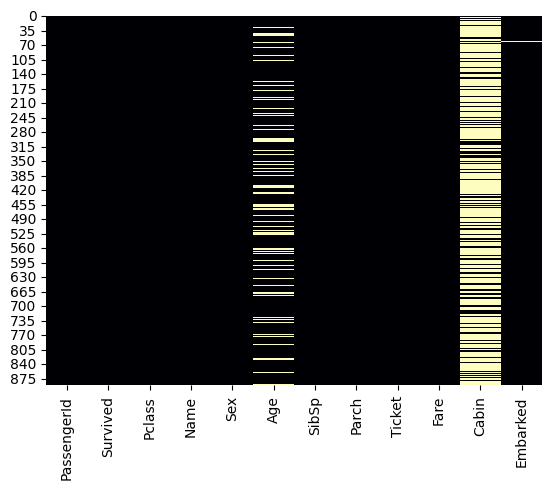

In [8]:
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False);

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### **Handling Missing Values**

In [10]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [11]:
df['Embarked'].fillna(df['Embarked'].mode(), inplace=True)

In [12]:
df['Age'].median()

np.float64(28.0)

In [13]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### **Summary**<br>
Misssing Values<br>
Age: **177**, Cabin: **687**, Embarked: **2** <br>

**Age** - Imputing missing values using **median** because of continuous numerical<br>
**Embarked** - Imputing missing values using **mode** because of categorical variable.<br>
**Cabin** - Eventually to be dropped for high missing values

#### **Encoding** 
**Sex** - Manually encoded by setting male to 1 and female to 0 <br>
**Embarked** - Encoded using One Hot Encoding <br>
**Pclass** - Encoded using One Hot Encoding 


In [14]:
df['Sex']=df['Sex'].replace({'male':1,'female':0})

# One-hot encoding for 'Embarked' and 'Pclass'
df = pd.get_dummies(df, columns=['Embarked'])

df = pd.get_dummies(df, columns=['Pclass'], prefix='Pclass')

df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,True,False,False,True,False,False
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,False,False,True,True,False,False
4,5,0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,False,False,True,False,False,True


### **4. Feature Engineering**

In [15]:
# Family size Siblings,Spouse,Parents and Children into singgle column
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Is alone default to one  
df['IsAlone'] = 1
df.loc[df['FamilySize'] > 1, 'IsAlone'] = 0

# Age bins  divide the columns into fixed bins
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 60, 80], labels=False)

# Fare bins fare prices divided into 4 quartiles
df['FareBin'] = pd.qcut(df['Fare'], 4, labels=False)


In [16]:
df.drop(['Cabin', 'PassengerId', 'Name', 'Ticket', 'Age', 'Fare'], axis=1, inplace=True)

In [17]:
df = pd.get_dummies(df, columns=['AgeBin'], prefix='AgeBin')


**Feature Engineering** 
- **FamilySize:** Calculates total family size including the passenger.
- **IsAlone:** Flags passengers traveling alone with IsAlone = 1, else 0.
- **AgeBin:** Categorizes Age into fixed bins: child to senior. **(also one hot encoded)**
- **FareBin:** Divides Fare into 4 quartiles for distribution-based grouping.

**Dropping Unnecessary Columns**
- **Cabin** - dropped becuase of more than 50 percent of the data is missing <br>
- **Passenger ID** - only an Identifier and does have any contribution <br>
- **Name** - Irrelevant feature, no contribution in prediction <br>
- **Ticket** - Random Alphanumeric codes no clear pattern <br>
- **Age** and **Fare**: Columns are dropped as it is no longer required.
 

### **5. Correlation Matrix**

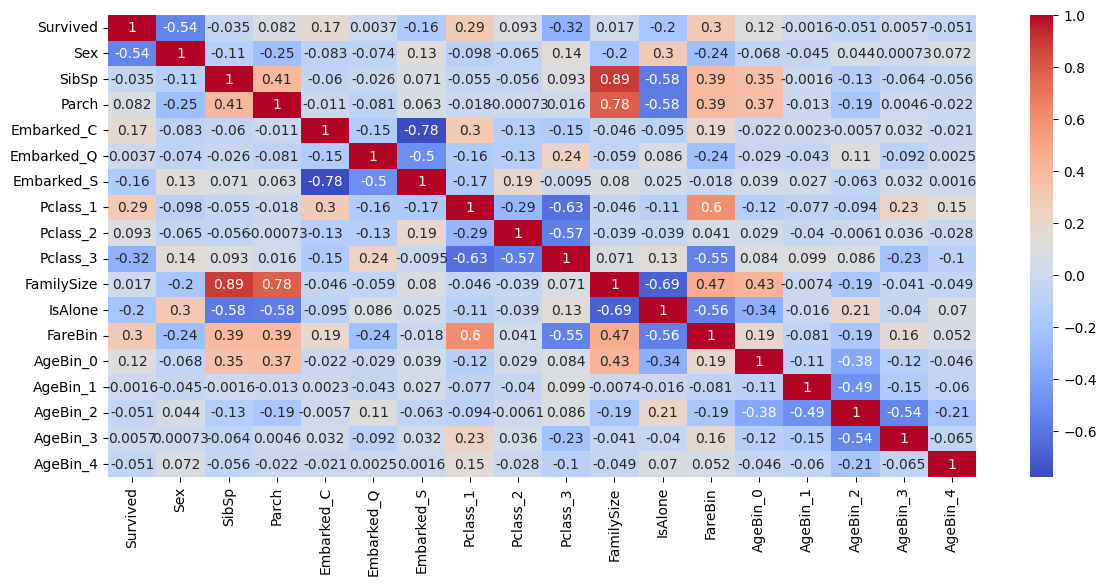

In [18]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [19]:
df.drop(['SibSp','Parch','Embarked_C','Embarked_Q','Pclass_2','AgeBin_1','AgeBin_4'],axis=1,inplace=True)

**Dropped Features**
- **SibSp,Parch**: Low Correlation redundant via FamilySize
- **FamilySize**: Very low Correlation (0.017)
- **Agebin**:Weak Signal(-0.093)
- **Embarked_C, Embarked_Q, Pclass_2**: Dummy Columns dropped (avoiding multicollinearity) 

In [20]:
df.head()

,Survived,Sex,Embarked_S,Pclass_1,Pclass_3,FamilySize,IsAlone,FareBin,AgeBin_0,AgeBin_2,AgeBin_3
0,0,1,True,False,True,2,0,0,False,True,False
1,1,0,False,True,False,2,0,3,False,True,False
2,1,0,True,False,True,1,1,1,False,True,False
3,1,0,True,True,False,2,0,3,False,True,False
4,0,1,True,False,True,1,1,1,False,True,False


### **6. Model Development**

#### **i. Model Splitting into Train and Test**
Training Data = 70%, Testing Data = 20%, Validation Set =10%

In [21]:
X = df.drop('Survived', axis=1)
y = df['Survived']

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into train (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split temp into test (20%) and hold-out (10%)
X_test, X_holdout, y_test, y_holdout = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)

# Print shapes
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)
print("Hold-out set:", X_holdout.shape, y_holdout.shape)


Train set: (623, 10) (623,)
Test set: (178, 10) (178,)
Hold-out set: (90, 10) (90,)


#### **ii. Model Development**
##### **a. Logistic Regression**

In [22]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy: {accuracy_lr:.4f}')

print('\nClassification Report:')
lr_class=classification_report(y_test, y_pred_lr)
print(lr_class)

print('\nConfusion Matrix:')
lr_conf=confusion_matrix(y_test, y_pred_lr)
print(lr_conf)

Accuracy: 0.8258

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       101
           1       0.83      0.75      0.79        77

    accuracy                           0.83       178
   macro avg       0.83      0.82      0.82       178
weighted avg       0.83      0.83      0.82       178


Confusion Matrix:
[[89 12]
 [19 58]]


##### **b. Decision Tree Classifier**

In [23]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'\nDecision Tree Accuracy: {accuracy_dt:.4f}')

print('\nDecision Tree Classification Report:')
dt_class=classification_report(y_test, y_pred_dt)
print(dt_class)

print('\nDecision Tree Confusion Matrix:')
dt_conf =confusion_matrix(y_test, y_pred_dt)
print(dt_conf)


Decision Tree Accuracy: 0.8315

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       101
           1       0.86      0.73      0.79        77

    accuracy                           0.83       178
   macro avg       0.84      0.82      0.82       178
weighted avg       0.83      0.83      0.83       178


Decision Tree Confusion Matrix:
[[92  9]
 [21 56]]


##### **c. Random Forest Classifier**

In [24]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators is the number of trees in the forest
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'\nRandom Forest Accuracy: {accuracy_rf:.2f}')

print('\nRandom Forest Classification Report:')
rf_class=classification_report(y_test, y_pred_rf)
print(rf_class)

print('\nRandom Forest Confusion Matrix:')
rf_conf=confusion_matrix(y_test, y_pred_rf)
print(rf_conf)


Random Forest Accuracy: 0.84

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       101
           1       0.86      0.74      0.80        77

    accuracy                           0.84       178
   macro avg       0.84      0.83      0.83       178
weighted avg       0.84      0.84      0.84       178


Random Forest Confusion Matrix:
[[92  9]
 [20 57]]


#### **iii. Model Comparison**

In [25]:

models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [accuracy_lr, accuracy_dt, accuracy_rf]

model_accuracies = list(zip(models, accuracies))

model_accuracies_sorted = sorted(model_accuracies, key=lambda x: x[1], reverse=True)
print(model_accuracies_sorted)


[('Random Forest', 0.8370786516853933), ('Decision Tree', 0.8314606741573034), ('Logistic Regression', 0.8258426966292135)]


**Ranked Best Performing Model [Accuracy]** <br>
**1. Random Forest Classifier** -      **83.70%** <br>
**2. Decision tree Classifier** -      **83.14%** <br>
**3. Logistic Regression** -           **82.58%** <br>


### **7. Training with Cross Validation**

In [26]:
log_model = LogisticRegression()

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(log_model, X_train, y_train, cv=kfold)

print("K-Fold Accuracy Scores Logistic :", scores)
print("Average Accuracy Logistic:", np.mean(scores))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

K-Fold Accuracy Scores Logistic : [0.832      0.784      0.784      0.76612903 0.86290323]
Average Accuracy Logistic: 0.8058064516129033
Logistic Regression Accuracy: 0.8258426966292135


In [27]:
dt_model = DecisionTreeClassifier(random_state=42)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(dt_model, X_train, y_train, cv=kfold)

print("K-Fold Accuracy Scores Decision Tree:", scores)
print("Average Accuracy Decision Tree:", np.mean(scores))

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


K-Fold Accuracy Scores Decision Tree: [0.792      0.808      0.8        0.7983871  0.83064516]
Average Accuracy Decision Tree: 0.8058064516129033
Decision Tree Accuracy: 0.8314606741573034


In [28]:
rf_model = RandomForestClassifier(random_state=42)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(rf_model, X_train, y_train, cv=kfold)

print("K-Fold Accuracy Scores Random Forest:", scores)
print("Average Accuracy Random Forest:", np.mean(scores))

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

K-Fold Accuracy Scores Random Forest: [0.808      0.808      0.816      0.78225806 0.86290323]
Average Accuracy Random Forest: 0.8154322580645161
Random Forest Accuracy: 0.8370786516853933


### **8. HyperParameter Tuning**

In [29]:
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('logreg',LogisticRegression())
])

param_grid = {
    'logreg__penalty': ['l1','l2'],
    'logreg__C': [0.01,0.1,1,10,100],
    'logreg__solver': ['liblinear']
}
cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X,y)

best_model_lr = grid_search.best_estimator_
# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'logreg__C': 0.1, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}
Best Score: 0.802510827945515


In [30]:
y_pred_holdout_lr = best_model_lr.predict(X_holdout)

holdout_acc_lr=accuracy_score(y_holdout,y_pred_holdout_lr)
print(f'\n Holdout Accuracy: {holdout_acc_lr:.2f}')



 Holdout Accuracy: 0.80


In [31]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_dt_model = grid_search.best_estimator_

y_pred_best_dt = best_dt_model.predict(X_test)

print("Best Score:", grid_search.best_score_)
print('\nBest Parameters found by GridSearchCV:')
print(grid_search.best_params_)


Best Score: 0.8233935483870969

Best Parameters found by GridSearchCV:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [32]:
y_pred_holdout_dt = best_dt_model.predict(X_holdout)

holdout_acc_dt=accuracy_score(y_holdout,y_pred_holdout_dt)
print(f'\n Holdout Accuracy: {holdout_acc_dt:.2f}')


 Holdout Accuracy: 0.78


#### **Confusion Matrix**

Confusion Matrix:


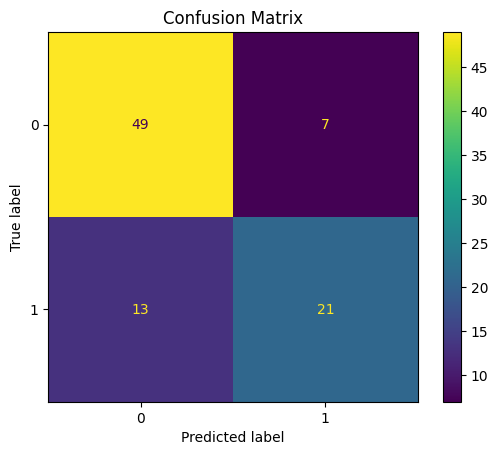

In [33]:
cm = confusion_matrix(y_holdout, y_pred_holdout_dt)
print("Confusion Matrix:")

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

#### **ROC-AUC Score**

ROC AUC Score: 0.8568802521008403


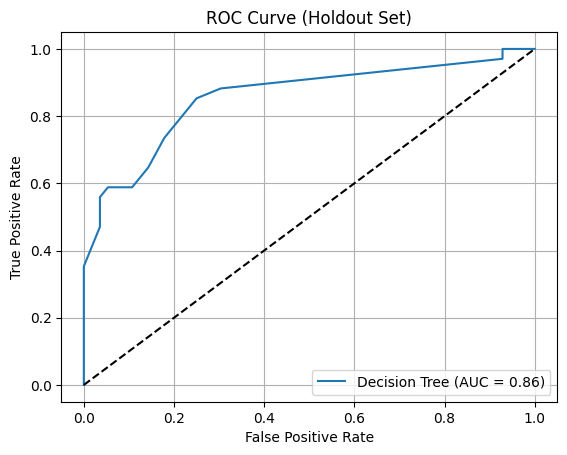

In [34]:
y_proba = best_dt_model.predict_proba(X_holdout)[:, 1]

fpr, tpr, threshold = roc_curve(y_holdout, y_proba)

roc_auc = roc_auc_score(y_holdout, y_proba)
print("ROC AUC Score:", roc_auc)

plt.figure()
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')# Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Holdout Set)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


**Titanic Survival Case Study Summary:** Developed and Evaluated Machine Learning Models to predict passenger Survival on the Titanic Dataset. Models are evaluated using K fold Cross validation and a hold out test dataset.
Decision Tree Classifer is choosen as the final model for its high accuracy and interpretability.
- Decision Tree Accuracy: 83.14
- K-Fold: 80.58
- AUC Score: 0.86